# NAME- SANNA SOIN 

In [40]:
# importing the libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# importing the Iris dataset
iris = pd.read_csv("Iris.csv")
iris_1 = iris.drop(columns=["Id","Species"])


In [42]:
iris_df = pd.DataFrame(iris_1)
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
#select the required columns
x = iris_df.iloc[:,[0,1,2,3]].values
x.shape

(150, 4)

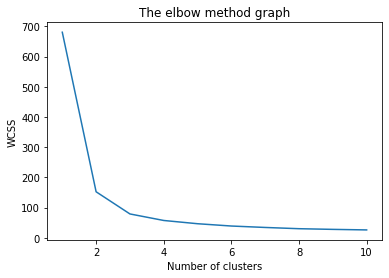

In [44]:
#use KMeans class from the sklearn library
from sklearn.cluster import KMeans
#Used the elbow method to find the optimal number of clusters
#Compute within cluster sum of square
WCSS=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
#Plot the elbow graph
plt.plot(range(1,11), WCSS)
plt.title("The elbow method graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
#From the graph above it can be seen that the optimal number of clusters are 3.
#Apply k-means algorithm to x dataset
kmeans = KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
# Determining for each observation which cluster it belongs to
y_kmeans=kmeans.fit_predict(x)

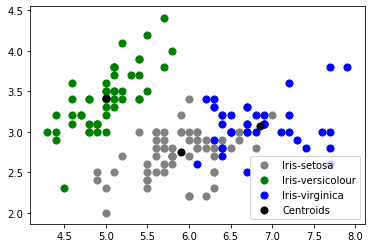

In [46]:
# Visualising the clusters-on the sepal length and width
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans==0,1], s=50,c="grey",label="Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans==1,1], s=50,c="green",label="Iris-versicolour")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans==2,1], s=50,c="blue",label="Iris-virginica")

# Plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50, c="black", label="Centroids")
plt.legend()



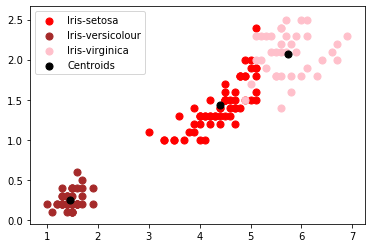

In [47]:
# Visualising the clusters-on the Petal length and width
plt.scatter(x[y_kmeans == 0,2],x[y_kmeans==0,3], s=50,c="red",label="Iris-setosa")
plt.scatter(x[y_kmeans == 1,2],x[y_kmeans==1,3], s=50,c="brown",label="Iris-versicolour")
plt.scatter(x[y_kmeans == 2,2],x[y_kmeans==2,3], s=50,c="pink",label="Iris-virginica")
#Plot the centroid
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], s=50, c="black", label="Centroids")
plt.legend()
